特鲁普效应是著名的心理学现象，展示了人们对事物的认知过程已是一个自动化的历程。当有一个新的刺激出现时，如果它的特征和原先的刺激相似或符合一致，便会加速人们的认知；反之，若新的刺激特征与原先的刺激不相同，则会干扰人们的认知，使人们的所需的反映数据变长。

简单来说，斯特鲁普效应是当有与原有认知不同的情况出现时，人们的反应时间会较长。

我们想要验证斯特鲁普效应。

# 一、描述统计分析

提供两组文字，一组文字与颜色相同，另一组文字与颜色不同。  
令一组试验者25人分别读取两组数据。   
显然，试验者是同一批人，这里分析的是其在两种不同情况下的结果，因此为相关配对检验。

In [2]:
#导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#注意路径和文件名称不要使用中文，否则会报错
dataSer=pd.read_csv(r'E:\Jupyter\stroopdata.csv')

In [7]:
dataSer.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,13.926875,22.350750
std,3.540219,5.010218
min,8.630000,15.687000
25%,11.895250,18.716750
50%,13.627500,21.046000
75%,15.671250,24.536000
max,22.328000,35.255000


可以看到congruent（一致）数据的均值和方差均小于incongruent（不一致）数据的均值和方差

In [10]:
#计算一致样本平均值和标准差
con_mean=dataSer['Congruent'].mean()
con_std=dataSer['Congruent'].std()

#计算不一致样本的均值和方差
incon_mean=dataSer['Incongruent'].mean()
incon_std=dataSer['Incongruent'].std()

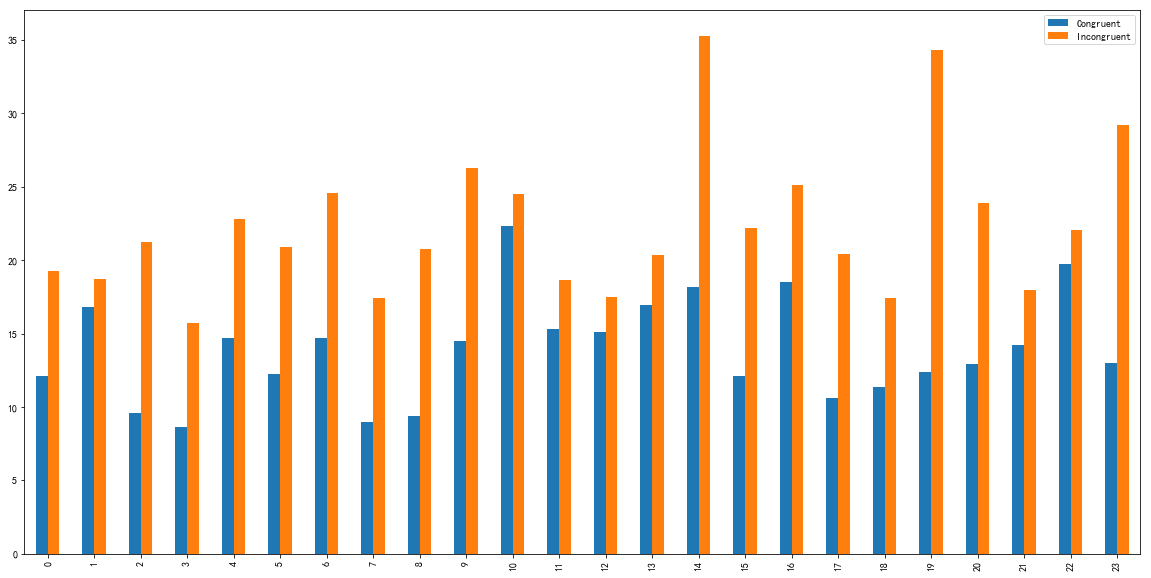

In [25]:
#设计画板
fig=plt.figure(figsize=(20,10))
#设计画纸
ax = fig.add_subplot(1,1,1)
#绘图
dataSer.plot(kind='bar',ax=ax)
plt.show()

# 二、推论统计分析

推论统计分析报告中包括：假设检验，置信区间，效应量

## 1.问题是什么？

### 零假设和备选假设

根据上面的问题，我们做出两个截然相反的假设：  
零假设H0：斯特鲁普效应不存在，即两组受试者之间无显著差异；   
备选假设：斯特鲁普效应存在，即两组受试者间存在显著差异。    
需要说明的是，零假设总是表述为研究没有改变，没有效果，不起作用等，即不满足标准

### 抽样分布类型

在本次案例中，样本大小是10（小于30），固属于小样本，不能采用正态分布。  
宜根据其分布情况，如果数据分布近似正态分布，则可以采用t分布。

下面，我们看下两组数据差值的分布类型

In [27]:
data=dataSer['Congruent']-dataSer['Incongruent']

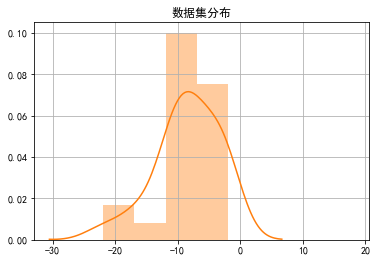

In [29]:
import seaborn as sns

sns.distplot(data)
plt.title('数据集分布')
plt.grid(True)
plt.show()

上图可见，数据集近似正态分布，满足t分布的使用条件，所以可以认为抽样分布是自由度df=23（23-1）的t分布

### 检验方向

本检验考虑的是是否样本1的数据普遍小于样本2，固应属于单尾检验中的左尾检验。

## 2.证据是什么？

在零假设成立的前提下，得到样本平均值的概率p是多少？
计算p值的步骤如下：  
1）计算出标准误差  
标准误差=样本标准差除以样本大小n的开方。这里的样本标准差是用来估计总体标准差的  
2）计算出t值  
t=（样本平均值-总体平均值）/标准误差  
3）根据t值，查找t表格，得到概率p值  

In [31]:
'''
用python统计包scipy自动计算
用scipy计算出的是：双尾检验
单（1samp）样本t检验（ttest_1samp）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
相关（related）配对t检验（ttest_rel）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
双独立（independent）样本t检验（ttest_ind）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
'''
from scipy import stats

'''
ttest_rel：
返回的第1个值t是假设检验计算出的（t值），
第2个值p是双尾检验的p值
'''
t,p_twoTail =stats.ttest_rel(dataSer['Congruent'],dataSer['Incongruent'])

print('t值=',t,'双尾检验的p值=',p_twoTail) 

t值= -8.08861087281 双尾检验的p值= 3.54871914972e-08


In [32]:
'''
因为直接用scipy计算出的是双尾检验的t值和p值，但是这里是左尾检验。  
根据对称性，双尾的p值是单尾的2倍
'''
p_oneTail=p_twoTail/2

print('单尾检验的p值=',p_oneTail)

单尾检验的p值= 1.77435957486e-08


### 3.判断标准是什么？

In [33]:
#判断标准（显著水平）使用alpha=5%
alpha=0.05

### 4.做出结论

In [34]:
'''
左尾判断条件：t < 0 and  p < 判断标准（显著水平）alpha
右尾判断条件：t > 0 and  p < 判断标准（显著水平）alpha
'''
#做出结论
if(t<0 and p_oneTail< alpha): 
    #左尾判断条件
    print('拒绝零假设，有统计显著，存在斯特鲁普效应')
else: 
    print('接受零假设，没有统计显著，不存在斯特鲁普效应')

拒绝零假设，有统计显著，存在斯特鲁普效应


由此，基于APA（美国心理学会）的推论统计结果，  
t(23)=-8,p=1.77435957486e-08（alpha=5%）,单尾检验中的左尾检验。

## 5.置信区间

In [37]:
'''
1）置信水平对应的t值（t_ci）
查t表格可以得到，95%的置信水平，自由度是n-1对应的t值
2）计算上下限
置信区间上限a=样本平均值 - t_ci ×标准误差
置信区间下限b=样本平均值 - t_ci ×标准误差
'''

'''
查找t表格获取
95%的置信水平，自由度是n-1对应的t值，
注意：课程中这里对应的下面t_ci值有误，以下面的值为准
标准误差:https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html
'''
t_ci=2.064
#使用scipy计算标准误差
se=stats.sem(data)
a=data.mean()-t_ci*se
b=data.mean()+t_ci*se

In [38]:
print('单个平均值的置信区间，95置信水平 CI=(%f,%f)' % (a,b))

单个平均值的置信区间，95置信水平 CI=(-10.573426,-6.274324)


### 6、效应量

还需要在报告中给出效应量（effect size）。什么是效应量呢？

效应量是指处理效应的大小，例如药物A比药物B效果显著。度量效应量有很多种，但大多数都属于两大主要类别。

1）第一种叫做差异度量

例如在对比平均值时，衡量效应大小的常见标准之一是Cohen's d

Cohen's d = （样本平均值1-样本平均值2) / 标准差  

Cohen's d 除以的是标准差，也就是以标准差为单位，样本平均值和总体平均值之间相差多少。

2）第二种叫做相关度度量

例如R平方，表示某个变量的变化比例与另一变量的关系。可以用t检验的信息推出R平方的公式，这里的t值从t检验中获得的值，df是自由度。

r2=t2 / (t2+df),其中r2是指r的平方，t2是t的平方

如果r平方等于20%，表示我们可以说通过知道另一个变量能够接受相关变量20%的变化情况

In [39]:
'''
效应量：差异指标Cohen's d
'''
#这里总体的平均值（pop_mean）无法确定，因此第一种效应指标无法应用
#d=(sample_mean - pop_mean) / sample_std
'''
效应量：相关度指标R2
'''
#样本大小
n=24
#自由度
df=n-1
R2=(t*t)/(t*t+df)

print('R2=',R2)

R2= 0.739894405287


根据R2>0.25,效果显著

# 三、数据统计报告

1、描述统计分析

第一组样本数据：字体内容和字体颜色一致情况下，平均反应时间是: 13.92 秒,标准差是 3.54 秒

第二组样本数据：字体内容和字体颜色不一致情况下，平均反应时间是: 22.35 秒,标准差是 5.01 秒

“不一致”情况下所用时间均大于“一致”情况，也就是当字体内容和字体验证不一致时，实验者的平均反应时间变长

2、推论统计分析

1）假设检验

相关配对检验t(23)=-8,p=1.77435957486e-08（alpha=5%）,单尾检验中的左尾检验。

统计上存在显著差异，拒绝零假设，从而验证斯特鲁普效应存在。


2）置信区间

两个平均值差值的置信区间，95%置信水平 CI=[-10.573426,-6.274324]

3）效应量

R2= 0.739894405287